In [0]:
# tensorflow.keras.etc is for TF 1.14
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
clean_label = "/content/drive/My Drive/Colab Notebooks/clean_labeled_dataset.csv";
clean_label_data = pd.read_csv(clean_label)
clean_label_data.shape
clean_label_data.head(2)

,Label,Article
0,False,know you are troubl person blood org rever jou...
1,True,gpe promin norp cleric whip controversi issu r...


In [0]:
clean_unlabel = "/content/drive/My Drive/Colab Notebooks/clean_unlabeled_dataset.csv";
clean_unlabel_data = pd.read_csv(clean_unlabel)
clean_unlabel_data.shape
clean_unlabel_data.head(2)

,Label,Article
0,NaN,date hockey fan bless slate game time date sou...
1,NaN,writer org seri soprano took anoth dare storyt...


In [0]:
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.python.keras.preprocessing.text import Tokenizer
import numpy as np
#converting data. into bool 
clean_label_data['Label']= clean_label_data['Label'].astype(int)
clean_label_data['Article']= clean_label_data['Article'].astype(str)
train_size = int(0.8 * len(clean_label_data))
test_size = len(clean_label_data) - train_size
labels=clean_label_data['Label']
features=clean_label_data['Article']

#splitting into test and train
x_train= clean_label_data.loc[:train_size,'Article'].values
y_train= clean_label_data.loc[:train_size,'Label'].values
x_test= clean_label_data.loc[(train_size+1):,'Article'].values
y_test= clean_label_data.loc[(train_size+1):,'Label'].values

#converting into np arrray
y_train = np.array(y_train)
y_test = np.array(y_test)

#len(x_train), len(y_train), len(x_test), len(y_test),y_test,y_train,

#X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state = 42)

In [0]:
## not removing stop words to maintain word context
max_words = 2000
max_len = 400
tokenizer=Tokenizer (num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)
#token = Tokenizer(num_words=max_words, lower=True, split=' ')
tokenizer.fit_on_texts(clean_label_data['Article'].values)
x_train_token=tokenizer.texts_to_sequences(x_train)
x_test_token=tokenizer.texts_to_sequences(x_test)
x_train_seq = sequence.pad_sequences(x_train_token, maxlen=max_len)
x_test_seq=sequence.pad_sequences(x_test_token, maxlen=max_len)

#defining vocalbury size 
vocab_size = len(tokenizer.word_index)+1


In [0]:
labels=clean_label_data['Label']
features=clean_label_data['Article']
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state = 42)

In [0]:
embed_dim = 50
lstm_out = 64
batch_size = 32

model_LSTM = Sequential()
model_LSTM.add(Embedding(vocab_size, embed_dim, input_length = max_len))
model_LSTM.add(LSTM(lstm_out))
model_LSTM.add(Dense(256))
model_LSTM.add(Activation('relu'))
model_LSTM.add(Dropout(0.5))
model_LSTM.add(Dense(1, name='out_layer'))
model_LSTM.add(Activation('sigmoid'))
model_LSTM.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model_LSTM.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 400, 50)           7392850   
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               16640     
_________________________________________________________________
activation_10 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
_________________________________________________________________
activation_11 (Activation)   (None, 1)                

In [0]:
history = model_LSTM.fit(x_train_seq, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=[x_test_seq, y_test])

Epoch 1/3
315/315 [==============================] - 97s 307ms/step - loss: 0.5254 - accuracy: 0.7828 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/3
315/315 [==============================] - 96s 305ms/step - loss: 0.3766 - accuracy: 0.8322 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/3
315/315 [==============================] - 96s 305ms/step - loss: 0.1631 - accuracy: 0.9386 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [0]:
model_LSTM.evaluate(x_test_seq, y_test)

79/79 [==============================] - 4s 47ms/step - loss: 0.5129 - accuracy: 0.7897


[0.5129401087760925, 0.7897456288337708]

In [0]:
model_LSTM.save('my_model.h5')

In [0]:
max_len = 400
#prediction validation
#tokenizer=Tokenizer (num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)
data_tail= clean_label_data.tail(3000)
x_predict= clean_label_data['Article']
y_original = clean_label_data['Label']
seq=tokenizer.texts_to_sequences(x_predict)
x_to_predict = sequence.pad_sequences(seq, maxlen=max_len)
# data_head,x_predict,y_ori,x_to_predict

#prediction
y_hat= model_LSTM.predict(x_to_predict)
y_bool=(np.greater_equal(y_hat,0.80)).astype(int)
y_bool_predicted=y_bool.flatten()
y_bool_predicted
np.count_nonzero((np.equal(y_bool_predicted,y_original)).astype(int))
Accuracy = np.count_nonzero((np.equal(y_bool_predicted,y_original)).astype(int))/len(y_original)
print("Test Accuracy:",Accuracy)

Test Accuracy: 0.9421395644571611


([<matplotlib.axis.XTick at 0x7f685c7b84a8>,
 <a list of 5 Text major ticklabel objects>)

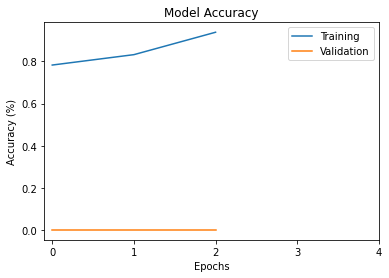

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Training', 'Validation'])
plt.ylabel('Accuracy (%)')
plt.xlabel('Epochs')
plt.xticks([0,1,2,3,4])

([<matplotlib.axis.XTick at 0x7f685c8c22b0>,
 <a list of 5 Text major ticklabel objects>)

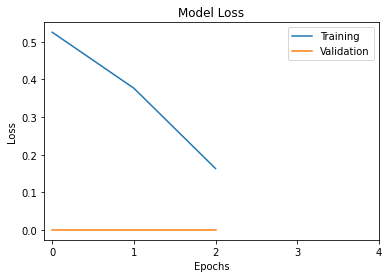

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Training', 'Validation'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.xticks([0,1,2,3,4])

In [0]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [0]:
top_words = 5000
max_review_length = 400
embedding_vecor_length = 64
model = Sequential()
model.add(Embedding(vocab_size, embedding_vecor_length, input_length=max_review_length, dropout=0.2))
model.add(LSTM(100, dropout_W=0.2, dropout_U=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(100, dropout=0.2, recurrent_dropout=0.2)`
  


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 64)           9462848   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 9,528,949
Trainable params: 9,528,949
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
history = model.fit(x_train_seq, y_train, batch_size=batch_size, epochs = 5, validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8052 samples, validate on 2014 samples
Epoch 1/5
8052/8052 [==============================] - 125s 16ms/step - loss: 0.5854 - accuracy: 0.7296 - val_loss: 0.3169 - val_accuracy: 1.0000
Epoch 2/5
8052/8052 [==============================] - 126s 16ms/step - loss: 0.4603 - accuracy: 0.7870 - val_loss: 0.3004 - val_accuracy: 0.8818
Epoch 3/5
8052/8052 [==============================] - 126s 16ms/step - loss: 0.2616 - accuracy: 0.8978 - val_loss: 0.4050 - val_accuracy: 0.8019
Epoch 4/5
8052/8052 [==============================] - 126s 16ms/step - loss: 0.1283 - accuracy: 0.9542 - val_loss: 0.6780 - val_accuracy: 0.7403
Epoch 5/5
8052/8052 [==============================] - 126s 16ms/step - loss: 0.0588 - accuracy: 0.9832 - val_loss: 0.7179 - val_accuracy: 0.7483


In [0]:
scores = model.evaluate(x_test_seq, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 69.12%


In [0]:
#prediction
y_hat= model.predict(x_to_predict)
y_bool=(np.greater_equal(y_hat,0.80)).astype(int)
y_bool_predicted=y_bool.flatten()
y_bool_predicted
np.count_nonzero((np.equal(y_bool_predicted,y_original)).astype(int))
Accuracy = np.count_nonzero((np.equal(y_bool_predicted,y_original)).astype(int))/len(y_original)
print("Test Accuracy:",Accuracy)

Test Accuracy: 0.9196471149260849


In [0]:
%time
# LSTM and CNN for fake news detection for 
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Bidirectional
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
#from tensorflow.python.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
# fix random seed for reproducibility
numpy.random.seed(7)
top_words = 5000
# truncate and pad input sequences
max_review_length = 400

# create the model
embedding_vecor_length = 100
model_cnn = Sequential()
model_cnn.add(Embedding(vocab_size, embedding_vecor_length, input_length=max_review_length))
model_cnn.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model_cnn.add(MaxPooling1D(pool_length=2))
model_cnn.add(LSTM(100))
model_cnn.add(Dense(1, activation='sigmoid'))
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model_cnn.fit(x_train_seq, y_train, nb_epoch=5, batch_size=64)


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 64)           9462848   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 9,528,949
Trainable params: 9,528,949
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/5
10066/10066 [==============================] - 77s 8ms/step - loss: 0.5207 - accuracy: 0.7842
Epoch 2/5
10066/10066 [==============================] - 77s 8ms/step - loss: 0.3693 - accuracy: 0.8278
Epoch 3/5
10066/10066 [==============================] - 77s 8ms/step - loss: 0.1672 - accuracy: 0.9356
Epoch 4/5
10066/10066 [==============================] - 77s 8ms/step - loss: 0.0560 - accuracy: 0.9799
Epoch 5/5
10066/10066 [==============================] - 77s 8ms/step - loss: 0.0170 - accuracy: 0.9950


In [0]:
# Final evaluation of the model
scores = model_cnn.evaluate(x_test_seq, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 71.30%


In [0]:
#prediction
y_hat= model_cnn.predict(x_to_predict)
y_bool=(np.greater_equal(y_hat,0.80)).astype(int)
y_bool_predicted=y_bool.flatten()
y_bool_predicted
np.count_nonzero((np.equal(y_bool_predicted,y_original)).astype(int))
Accuracy = np.count_nonzero((np.equal(y_bool_predicted,y_original)).astype(int))/len(y_original)
print("Test Accuracy:",Accuracy)

Test Accuracy: 0.951518041646797


In [0]:
%time
# LSTM and CNN for fake news detection for 
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Bidirectional
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
#from tensorflow.python.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
# fix random seed for reproducibility
numpy.random.seed(7)
top_words = 5000
# truncate and pad input sequences
max_review_length = 400

# create the model
embedding_vecor_length = 100
model_bicnn = Sequential()
model_bicnn.add(Embedding(vocab_size, embedding_vecor_length, input_length=max_review_length))
model_bicnn.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model_bicnn.add(MaxPooling1D(pool_length=2))
model_bicnn.add(Bidirectional(LSTM(64)))
model_bicnn.add(Dense(1, activation='sigmoid'))
model_bicnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model_bicnn.fit(x_train_seq, y_train, nb_epoch=5, batch_size=64)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 64)           9462848   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 9,528,949
Trainable params: 9,528,949
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/5
10066/10066 [==============================] - 87s 9ms/step - loss: 0.5262 - accuracy: 0.7783
Epoch 2/5
10066/10066 [==============================] - 85s 8ms/step - loss: 0.3890 - accuracy: 0.8160
Epoch 3/5
10066/10066 [==============================] - 85s 8ms/step - loss: 0.1697 - accuracy: 0.9343
Epoch 4/5
10066/10066 [==============================] - 85s 8ms/step - loss: 0.0522 - accuracy: 0.9851
Epoch 5/5
10066/10066 [==============================] - 85s 8ms/step - loss: 0.0166 - accuracy: 0.9961


In [0]:
# Final evaluation of the model
scores = model_bicnn.evaluate(x_test_seq, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 80.25%


In [0]:
#prediction
y_hat= model_bicnn.predict(x_to_predict)
y_bool=(np.greater_equal(y_hat,0.80)).astype(int)
y_bool_predicted=y_bool.flatten()
y_bool_predicted
np.count_nonzero((np.equal(y_bool_predicted,y_original)).astype(int))
Accuracy = np.count_nonzero((np.equal(y_bool_predicted,y_original)).astype(int))/len(y_original)
print("Test Accuracy:",Accuracy)

Test Accuracy: 0.9628834843427118


In [0]:
y_bool_predicted

array([0, 1, 0, ..., 1, 0, 0])

In [0]:
y_original

0        0
1        1
2        0
3        0
4        0
        ..
12577    0
12578    0
12579    0
12580    0
12581    0
Name: Label, Length: 12582, dtype: int64

In [0]:
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.python.keras.preprocessing.text import Tokenizer
import numpy as np
#converting data. into bool 
#clean_unlabel_data['Label']= clean_unlabel_data['Label'].astype(int)
clean_unlabel_data['Article']= clean_unlabel_data['Article'].astype(str)
train_size = int(0.8 * len(clean_unlabel_data))
test_size = len(clean_unlabel_data) - train_size
labels=clean_unlabel_data['Label']
features=clean_unlabel_data['Article']

#splitting into test and train
xu_train= clean_unlabel_data.loc[:train_size,'Article'].values
yu_train= clean_unlabel_data.loc[:train_size,'Label'].values
xu_test= clean_unlabel_data.loc[(train_size+1):,'Article'].values
yu_test= clean_unlabel_data.loc[(train_size+1):,'Label'].values

#converting into np arrray
yu_train = np.array(yu_train)
yu_test = np.array(yu_test)

#len(x_train), len(y_train), len(x_test), len(y_test),y_test,y_train,

#X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state = 42)

In [0]:
x_predict_ex = clean_unlabel_data['Article']
seq_exp=tokenizer.texts_to_sequences(x_predict_ex)
x_exp_predict = sequence.pad_sequences(seq_exp, maxlen=max_len)
#lstm prediction
y_exp_hat_lstm= model_LSTM.predict(x_exp_predict)
y_exp_hat_lstm=(np.greater_equal(y_exp_hat_lstm,0.80)).astype(int)

#cnn prediction
y_exp_hat_cnn= model_cnn.predict(x_exp_predict)
y_exp_hat_cnn=(np.greater_equal(y_exp_hat_cnn,0.80)).astype(int)
y_exp_hat_lstm,y_exp_hat_cnn

(array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]), array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]))

In [0]:
#bicnn prediction
y_exp_hat_bicnn= model_bicnn.predict(x_exp_predict)
y_exp_hat_bicnn=(np.greater_equal(y_exp_hat_bicnn,0.80)).astype(int)
y_exp_hat_bicnn

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [0]:
unique, counts = numpy.unique(y_exp_hat_bicnn, return_counts=True)
dict(zip(unique, counts))

{0: 45147, 1: 3807}

In [0]:
unique, counts = numpy.unique(y_exp_hat_lstm, return_counts=True)
dict(zip(unique, counts))

{0: 44826, 1: 4128}